In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist =fetch_openml('mnist_784',
                    as_frame=False)

In [3]:
X_train, y_train, X_test, y_test = mnist.data[:60000],mnist.target[:60000],mnist.data[60000:],mnist.target[60000:]

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca=PCA()

pca.fit(X_train)

PCA()

In [6]:
import numpy as np

In [7]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [8]:
d=np.argmax(cumsum>0.95)+1

In [9]:
d

154

In [10]:
pca = PCA(n_components=0.95)

In [11]:
X_reduced = pca.fit_transform(X_train)

In [13]:
len(X_train[0])

784

In [14]:
len(X_reduced[0])

154

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt


def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [16]:
X_recovered = pca.inverse_transform(X_reduced)

Text(0.5, 1.0, 'Compressed')

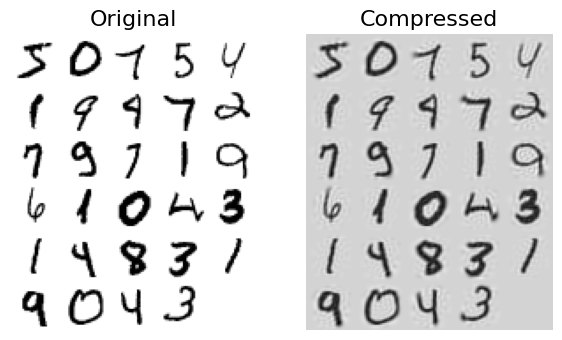

In [17]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

# save_fig("mnist_compression_plot")